# 경사하강법

- 신경망은 가중치를 업데이트 하면서 주어진 문제를 최적화한다.
- 가중치를 업데이트하는 가장 대표적 방법
- 특정 함수에서의 미분을 통해 얻을 기울기를 이용하여 최적의 값을 찾아가는(= 손실을 줄이는) 방법

## 패키지 불러오기

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## 2차함수 경사 하강법

- 이론상 최적화된 손실 제거

#### linspace란?

```python
np.linspace(start, stop, num)
```
- start: 배열의 시작값
- stop: 배열의 끝값
- num: start와 stop 사이를 num개의 일정한 간격으로 요소를 만들어라.
    - num을 생략하면 default는 50개

In [3]:
x = np.linspace(-2, 2, 50)
x

array([-2.        , -1.91836735, -1.83673469, -1.75510204, -1.67346939,
       -1.59183673, -1.51020408, -1.42857143, -1.34693878, -1.26530612,
       -1.18367347, -1.10204082, -1.02040816, -0.93877551, -0.85714286,
       -0.7755102 , -0.69387755, -0.6122449 , -0.53061224, -0.44897959,
       -0.36734694, -0.28571429, -0.20408163, -0.12244898, -0.04081633,
        0.04081633,  0.12244898,  0.20408163,  0.28571429,  0.36734694,
        0.44897959,  0.53061224,  0.6122449 ,  0.69387755,  0.7755102 ,
        0.85714286,  0.93877551,  1.02040816,  1.10204082,  1.18367347,
        1.26530612,  1.34693878,  1.42857143,  1.51020408,  1.59183673,
        1.67346939,  1.75510204,  1.83673469,  1.91836735,  2.        ])

In [4]:
x_square = [i ** 2 for i in x]

In [5]:
x_2 = np.linspace(-2, 2, 10)
x_2

array([-2.        , -1.55555556, -1.11111111, -0.66666667, -0.22222222,
        0.22222222,  0.66666667,  1.11111111,  1.55555556,  2.        ])

In [6]:
dev_x = [i ** 2 for i in x_2]

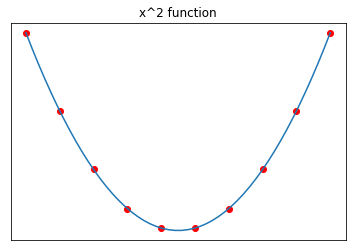

In [10]:
plt.title('x^2 function')
plt.plot(x, x_square)         # 파란 선
fig = plt.scatter(x_2, dev_x, color = 'red')    # 삘긴 점
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

## 4차 함수 경사 하강법

In [11]:
x = np.linspace(-10, 10, 300)
four_func = [(i) * (i - 1) * (i + 1) * (i + 3) for i in x]

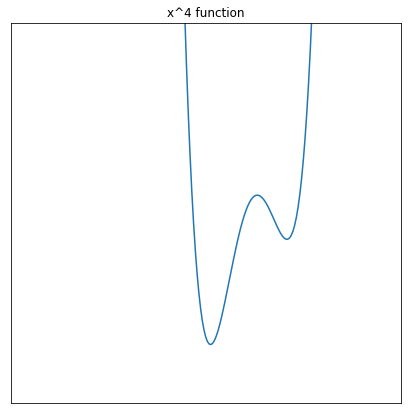

In [12]:
fig = plt.figure(figsize = (7, 7))
plt.title('x^4 function')
plt.plot(x, four_func)
plt.xlim(-10, 5)
plt.ylim(-10, 10)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
plt.show()

경사하강법의 목적은 전역 최소값을 찾는 것이다. 왼쪽에서 학습데이터가 출발할 경우 전역최소값을 찾을 수 있지만 오른쪽에서 학습데이터가 출발할 경우 지역 최소값에 빠져 학습에 실패할 수도 있다.

## 학습률이 작은 경우

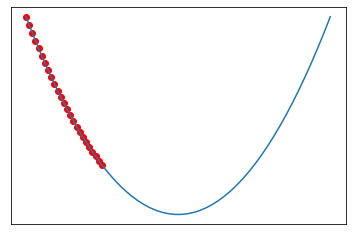

In [13]:
x = np.linspace(-2, 2, 50)
x_square = [i ** 2 for i in x]

x_2 = np.linspace(-2, -1, 25)
dev_x = [i ** 2 for i in x_2]

plt.plot(x, x_square)         # 파란 선
fig = plt.scatter(x_2, dev_x, color = 'red')    # 삘긴 점
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

## 학습률이 큰 경우

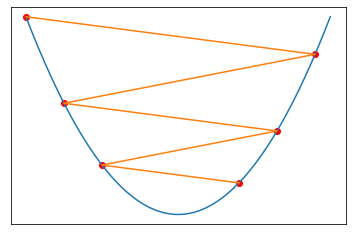

In [19]:
x = np.linspace(-2, 2, 50)
x_square = [i ** 2 for i in x]

x_2_a = np.linspace(-2, -1, 3)
x_2_b = np.linspace(0.8, 1.8, 3)
x_2 = np.concatenate((x_2_a, x_2_b))
dev_x = [i ** 2 for i in x_2]

a_list = []; b_list = []
for a, b in zip(x_2_a, x_2_b[:: -1]):
    a_list.append(a)
    a_list.append(b)
    b_list.append(a ** 2)
    b_list.append(b ** 2)
    
plt.plot(x, x_square)         # 함수를 그려주고,
fig = plt.scatter(x_2, dev_x, color = 'red')
plt.plot(a_list, b_list)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

plt.show()

## 경사하강법 실험

- 경사 하강법(Gradient Descent)은 1차 근사값 발견용 최적화 알고리즘.
- 함수의 기울기(경사)를 구하고 경사의 절대값이 낭즌 쪽으로 계속 이동시켜 최소값에; 이를 때 까지 반복시키는 것.
- 함수의 최소값 위치를 찾기 위해 비용함수(Cose Function)의 그레디언트 반대 방향으로 정의한 step size를 가지고 조금씩 움직여가면서 최적의 파라미터를 찾으려는 방법
    - 학습룰: f(X) = x^2 * ir

> * 그레디언트 : 파라미터에 애해 편미분한 벡터
> * 파마키터를 반복적으로 조금씩 움직이는 것이 관건이다.

### 패키지 참조 + 시드 고정

In [20]:
import numpy as np
import matplotlib.pyplot as plt

### 임의의 학습률 데이터 설정

In [42]:
lr_list = [0.001, 0.1, 0.3, 0.9]

### 경사하강법(SGD) 알고리즘 직접 구현하기
- SGD의 원리 이해하기

In [43]:
def get_derivative(lr):
    w_old = 2
    derivative = [w_old]
    
    # 손실 함수를 y = x^2로 정의한다.
    # -> 필요에 따라 개발자가 수식을 세워야 할 수 있다.
    y = [w_old ** 2]
    
    for i in range(1,10):
        # 미분값
        dev_value = w_old * 2
        
        # 가중치
        w_new = w_old - lr * dev_value
        w_old = w_new
        
        # 가중치 저장
        derivative.append(w_old)
        
        # 업데이트된 가중치의 손실값 저장
        y.append(w_old ** 2)
        
    return derivative, y

In [44]:
# 함수 테스트
d, y = get_derivative(2)
print(d)
print(y)

[2, -6, 18, -54, 162, -486, 1458, -4374, 13122, -39366]
[4, 36, 324, 2916, 26244, 236196, 2125764, 19131876, 172186884, 1549681956]


In [45]:
# 2차 방정식의 x와 y 준비하기
# -2 ~ 2의 범위를 50구간으로 나눈 배열
x = np.linspace(-2, 2, 50)

# x에 대한 2차 방정식의 해
x_square = [i ** 2 for i in x]

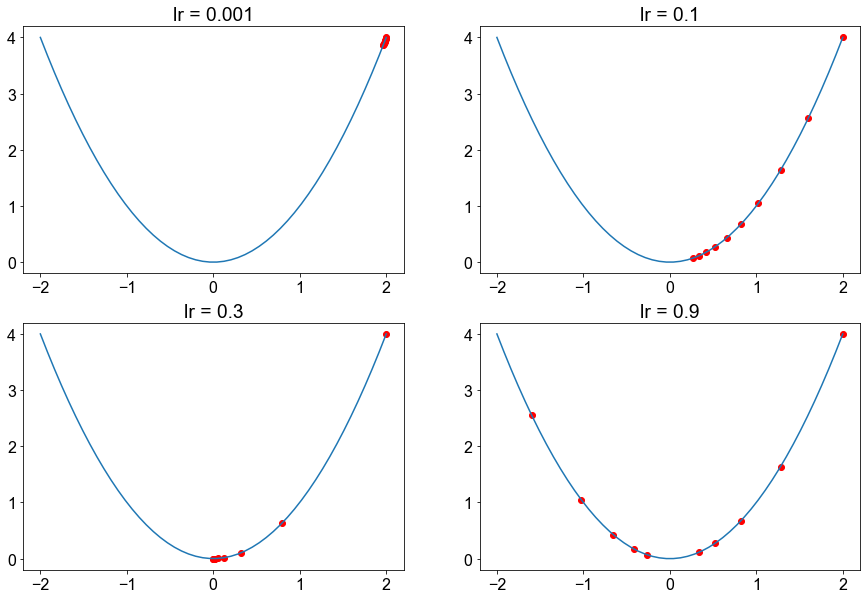

In [48]:
# 2차 방정식 안에서 경사 하강법의 과정 시각화
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (15, 10)

fig = plt.figure()

# 미리 준비한 학습률 리스트의 원소 수만큼 반복
# enumerate는 각각 인덱스와 값을 출력: i => 0, 1, 2, 3 lr ==> 0.001, 0.1, 0.3, 0.9
for i, lr in enumerate(lr_list):
    # 경사하강법 시행
    derivative, y = get_derivative(lr)
    
    # 2행 2열 중 i번째 항목이 그려질 서브플롯 구하기
    # (2행, 2열, 1번째), (2행, 2열, 2번째) 등등
    # 각각 1사분면, 2사분면, 3, 4분면의 위치라고 생각하면 쉽다.
    ax = fig.add_subplot(2, 2, i + 1)
    
    # 경사하강 결과를 산점도로 시각화
    ax.scatter(derivative, y, color = 'red')
    
    # 2차 방정식 그래프를 선으로 시각화
    ax.plot(x, x_square)
    
    # 그래프 제목
    ax.title.set_text('lr = ' + str(lr))
    
plt.show()